In [1]:
! pip install researchpy



In [66]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import datetime

## stat imports
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

import researchpy as rp
import scipy.stats as stats
from scipy.stats import skew 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 150)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#reset pd.reset_option('display.float_format')

from numpy import linalg as LA

from IPython.display import clear_output



# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# Others
import nltk
import string
import re
from collections import Counter
from matplotlib import pyplot

from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim import models

from nltk.stem import SnowballStemmer
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.manifold import TSNE

import csv

from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#tensorflow
import tensorflow.keras.backend as K
import tensorflow as tf

from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
import tensorflow.keras.backend as K
import tensorflow as tf

tf.config.run_functions_eagerly(True)

from tensorflow.python.client import device_lib

## running NN models

import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F
import torch

torch.manual_seed(1)



from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import os


#critical function spacing print
def v():
  print("\n")
  return None

v()
print("[[IMPORT OK]]")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aryavish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True



[[IMPORT OK]]


In [3]:
!pwd


from google.colab import drive
drive.mount('/content/drive') 

/content
Mounted at /content/drive


In [4]:
os.chdir("/content/drive/My Drive/Capcelona/Deals/Bus Dev/coursera review crap/math review/GMU Dept of Math/pred ana/OR 610 DLNN/hw/proj")

In [2]:
#play with twitter data

data = pd.read_csv("dataset/twitterfinal.csv", engine='python', header=None)



data.index
data.head()
list(data)
v()
data.shape

RangeIndex(start=0, stop=1600000, step=1)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


[0, 1, 2, 3, 4, 5]

(1600000, 6)

In [3]:
data.rename(columns={0: 'target',1: 'id', 2: 'date', 3: 'flag', 4: 'user', 5: 'text' }, inplace=True)

# polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

In [4]:
data

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
data.isnull().sum() / data.shape[0] ## no nulls

target   0.00000
id       0.00000
date     0.00000
flag     0.00000
user     0.00000
text     0.00000
dtype: float64

In [7]:
# basic EDA on his tweets

data['twlength'] = data.text.apply(lambda x: len(x))

In [7]:
data.date = pd.to_datetime(data['date'])

data['tw_day'] = [d.date() for d in data['date']]
data['tw_time'] = [d.time() for d in data['date']]

/home/aryavish/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning:

tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



In [8]:
data.head()

,target,id,date,flag,user,text,twlength,tw_day,tw_time
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57


In [9]:
data.twlength.describe() #outliers

count   1600000.00000
mean         74.04177
std          36.38800
min           6.00000
25%          44.00000
50%          69.00000
75%         104.00000
max         359.00000
Name: twlength, dtype: float64

In [10]:
cap = 280 # MAX tweet length as of 10/2020

data = data[data.twlength <= cap]



count   1599999.00000
mean         74.04159
std          36.38731
min           6.00000
25%          44.00000
50%          69.00000
75%         104.00000
max         235.00000
Name: twlength, dtype: float64

0.2629637089661638

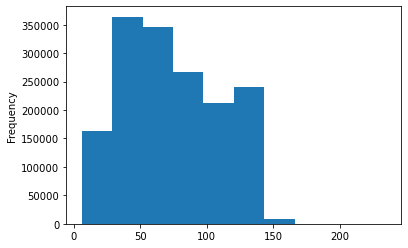

In [11]:
data.twlength.plot.hist()

data.twlength.describe()

v()

skew(data.twlength) #mean tweet length of 75



In [35]:
user_tweet_freq = data.groupby('user').agg(vcount = ('id','count')).sort_values(by="vcount", ascending=False)

user_tweet_freq.head(30)
user_tweet_freq[user_tweet_freq.vcount >= 2].vcount.describe()

user_tweet_freq.shape[0] # users

oldest = min(data.tw_day)
newest = max(data.tw_day)

dateper = (newest - oldest).days

print(f"# days in period data: ", dateper)

print("\n mean tweets per day is: ", user_tweet_freq.vcount.sum() / dateper)

,vcount
user,
lost_dog,549
webwoke,345
tweetpet,310
SallytheShizzle,281
VioletsCRUK,279
mcraddictal,276
tsarnick,248
what_bugs_u,246
Karen230683,238


count   254498.00000
mean         4.69443
std          7.01059
min          2.00000
25%          2.00000
50%          3.00000
75%          5.00000
max        549.00000
Name: vcount, dtype: float64

659775

# days in period data:  80

 mean tweets per day is:  19999.9875


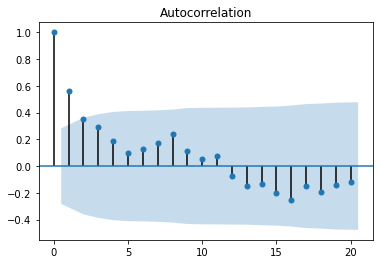

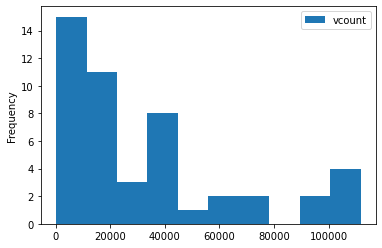

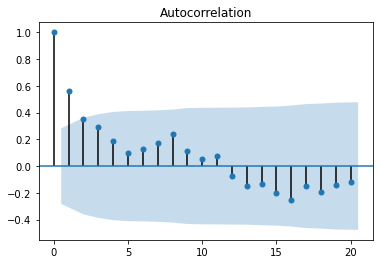

In [36]:
twperday = data.groupby('tw_day').agg(vcount = ('id','count'))

twperday.plot.hist()

plot_acf(twperday.vcount, lags=20) #clear indication of trend and looks like some periodicitity at lag = 7 --> weekly

In [37]:
## explore tweeting times

data.tw_time.describe()
v()
min(data.tw_time)
v()
max(data.tw_time) #he tweets 24 hrs a day

# add hour
data['hour'] = data.tw_time.apply(lambda x: x.hour)

twtime = data.groupby('hour').agg(vc = ('id','count'))


count      1599999
unique       86386
top       07:29:48
freq            66
Name: tw_time, dtype: object

datetime.time(0, 0)

datetime.time(23, 59, 59)

<ipython-input-37-49c72c71dee6>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



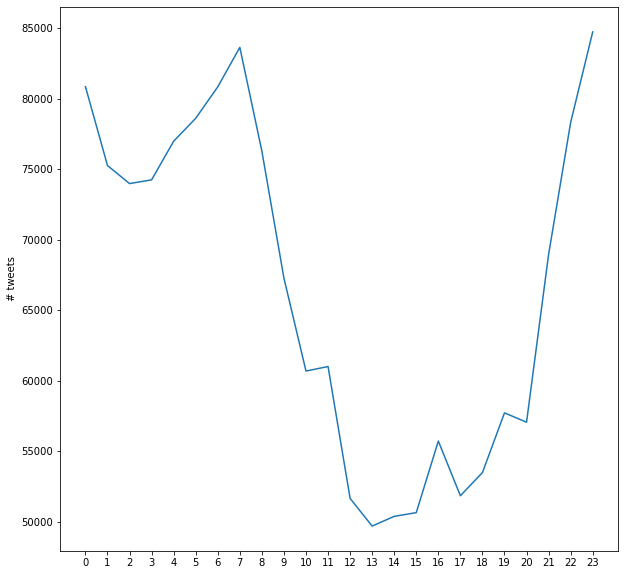

In [38]:
plt.figure(figsize=(10,10))
plt.plot(twtime.index,twtime.vc)
plt.ylabel("# tweets")
plt.xticks(twtime.index)
clear_output() 

#tweet peaks around 12-1pm, significant late night tweeting between 2-3AM and late night 10-11PM
#suspect he's asleep 4-8AM

##meaningless analysis since not normalized for specific time region

array([0, 4])

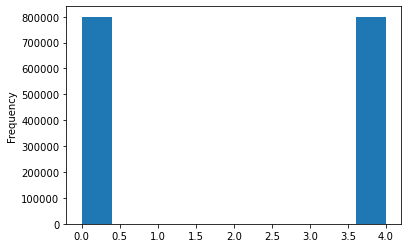

In [ ]:
data.target.plot.hist()
v()
data.target.unique() ##this data ONLY contains negative and positive tweets


In [39]:
#unique words eda

stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(data.text)

df_words = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)


In [40]:
df_words.shape #686k unique words

df_words.rename(columns={0: 'vcount'}, inplace=True)



(686634, 1)

In [41]:
df_words.head(10000).describe() #mean top 10k words appears 1028 times in all tweets

,vcount
count,10000.00000
mean,1028.79710
std,4062.55795
min,78.00000
25%,120.00000
50%,211.00000
75%,546.00000
max,91332.00000


<Figure size 2160x720 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fa21d004670>,
 <a list of 4 Text major ticklabel objects>)

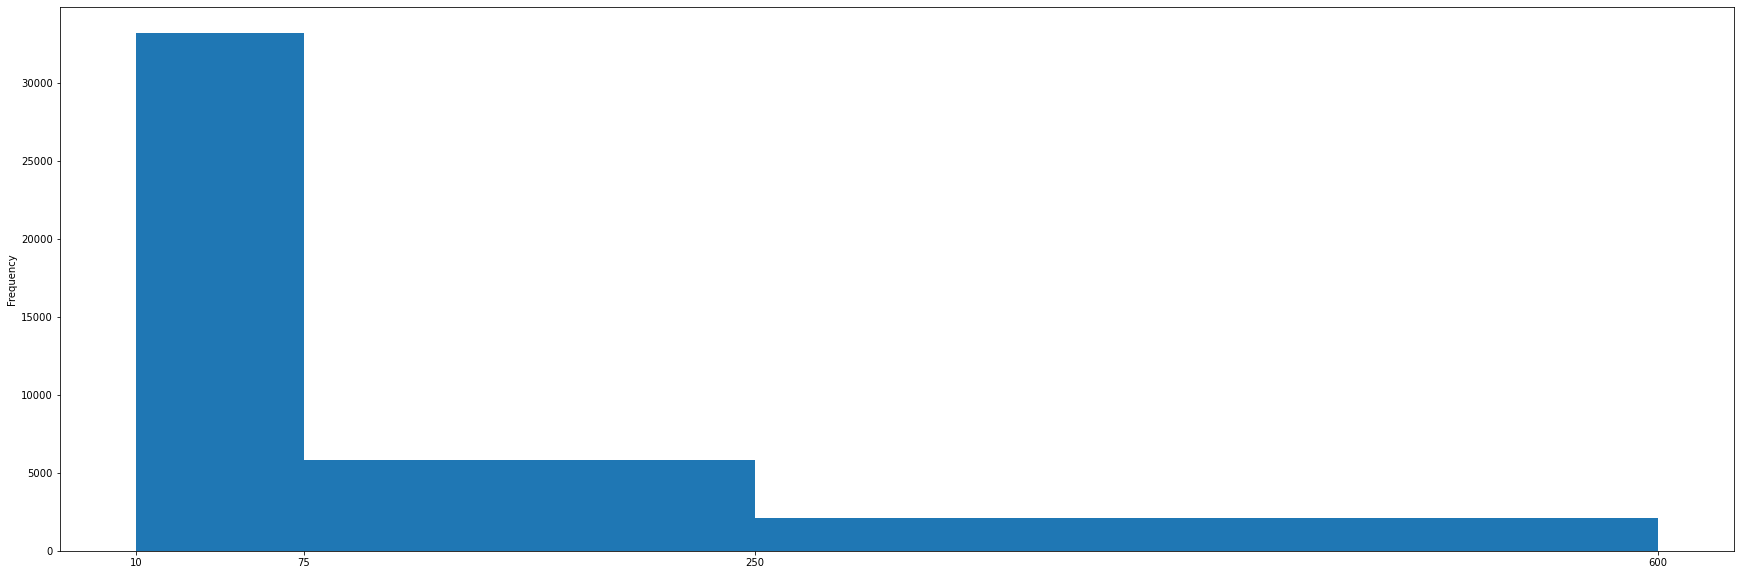

In [42]:
binlist = [10,75,250,600]
binwidth = 100

plt.figure(figsize=[30,10])
df_words.vcount.plot.hist(bins=binlist)
plt.xticks(binlist)

In [49]:
data['hashcount'] = data.text.apply(lambda x: x.count('@') + x.count('#') )

<ipython-input-49-a661141992f3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
data.hashcount.describe() #75% tweets have less than 1 hashtag

count   1599999.00000
mean          0.52754
std           0.64063
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          59.00000
Name: hashcount, dtype: float64

In [8]:
data

,target,id,date,flag,user,text,twlength
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65


In [16]:
data_tfidf = data[data.twlength > 70] #only look at top 50% tweets by length

In [28]:
data_tfidf.shape

(781297, 7)

In [60]:
## BI-gram tf/idf analysis

tfidf = TfidfVectorizer(analyzer="word", stop_words = 'english', ngram_range=(2,2), min_df=.001)
counts = tfidf.fit_transform(data_tfidf.text)


feature_names = tfidf.get_feature_names()

sums = counts.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(feature_names): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 

words.head(20)
#tf-idf top 20 by tf-idf score in top 50 data

bigram_top20 = words.head(20).iloc[:,1].sum()


,term,rank
113,twitpic com,8066.54882
58,http twitpic,7995.57614
5,bit ly,6170.14927
67,just got,6155.96056
50,http bit,6120.00209
14,don know,4568.86706
36,good morning,4040.50952
26,feel like,3953.07126
81,looking forward,3703.28416
108,tinyurl com,3679.51898


In [62]:
## TRI-gram tf/idf analysis

tfidf = TfidfVectorizer(analyzer="word", stop_words = 'english', ngram_range=(3,3), min_df=.001)
counts = tfidf.fit_transform(data_tfidf.text)


feature_names = tfidf.get_feature_names()

sums = counts.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(feature_names): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 

words.head(20)
#tf-idf top 20 by tf-idf score in top 50 data

trigram_top20 = words.head(20).iloc[:,1].sum()


,term,rank
11,http twitpic com,11620.54001
5,http bit ly,8876.39631
8,http tinyurl com,5261.76157
7,http plurk com,2813.69847
6,http blip fm,1883.65260
12,just got home,1428.57018
10,http tumblr com,1022.00000
9,http tr im,826.09248
0,100 followers day,539.17343
1,add train pay,536.32240


In [63]:
## 4-gram tf/idf analysis

tfidf = TfidfVectorizer(analyzer="word", stop_words = 'english', ngram_range=(4,4), min_df=.001)
counts = tfidf.fit_transform(data_tfidf.text)


feature_names = tfidf.get_feature_names()

sums = counts.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(feature_names): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 

words.head(20)
#tf-idf top 20 by tf-idf score in top 50 data

fourgram_top20 = words.head(20).iloc[:,1].sum()

,term,rank
0,100 followers day using,608.96794
1,add train pay vip,608.96794
2,com add train pay,608.96794
4,followers day using www,608.96794
3,day using www tweeteradder,304.49808
5,tweeteradder com add train,304.49808
6,using www tweeteradder com,304.49808
7,www tweeteradder com add,304.49808


array([[2.00000000e+00, 8.29479408e+04],
       [3.00000000e+00, 3.78260016e+04],
       [4.00000000e+00, 3.65386408e+03]])

<BarContainer object of 3 artists>

Text(0.5, 0, 'N-gram')

Text(0, 0.5, 'Sum Rank top 20')

([<matplotlib.axis.XTick at 0x7f537dc87fa0>,
 <a list of 3 Text major ticklabel objects>)

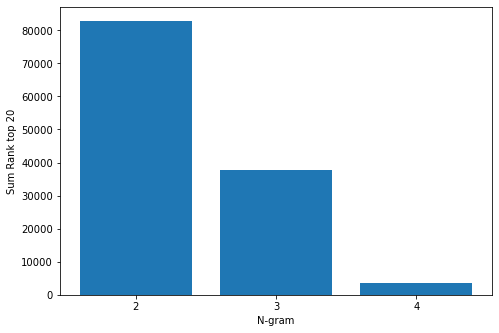

In [65]:
## plot n-grams

ngrams = np.array([(2,bigram_top20),(3,trigram_top20),(4,fourgram_top20)])

ngrams

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ngrams[:,0],ngrams[:,1])
ax.set_xlabel('N-gram')
ax.set_ylabel('Sum Rank top 20')
plt.xticks(ngrams[:,0])
plt.show()

In [45]:
## text preprocessing

## this needs to be augmented after reviewing top word frequences, for ex need to remmove https://, re, and other crap -- review individually analysis to be done in excel

def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"http://", " ", text)
    text = re.sub(r"http", " ", text)
    ## Stemming
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text
    


In [46]:
data['clean_tweet'] = data.text.apply(lambda x: clean_text(x))

<ipython-input-46-fc12198f2792>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['cl_twlength'] = data.clean_tweet.apply(lambda x: len(x))

<ipython-input-26-9387d1370271>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,hour,clean_tweet,cl_twlength
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45,22,switchfoot http : twitpic com 2y1zl awww that ...,88
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49,22,upset ca not updat facebook text it might cri ...,77
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53,22,kenichan dive mani time ball manag save 50 res...,53
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57,22,whole bodi feel itchi like fire,31
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57,22,nationwideclass no behav all i am mad here ca ...,59
...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,2009-06-16,08:40:49,8,woke up school best feel ever,29
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76,2009-06-16,08:40:49,8,thewdb com cool hear old walt interview ! http...,62
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,2009-06-16,08:40:49,8,readi mojo makeov ask detail,28
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,2009-06-16,08:40:49,8,happi 38th birthday boo alll time ! ! ! tupac ...,58


In [12]:
data.reset_index(level=0, inplace=True)

In [14]:
data.drop('index', axis=1, inplace=True)

In [15]:
data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,clean_tweet
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45,switchfoot : twitpic com 2y1zl awww that bumme...
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49,upset ca not updat facebook text it might cri ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53,kenichan dive mani time ball manag save 50 res...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57,whole bodi feel itchi like fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57,nationwideclass no behav all i am mad here ca ...
...,...,...,...,...,...,...,...,...,...,...
1599994,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,2009-06-16,08:40:49,woke up school best feel ever
1599995,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76,2009-06-16,08:40:49,thewdb com cool hear old walt interview ! : bl...
1599996,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,2009-06-16,08:40:49,readi mojo makeov ask detail
1599997,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,2009-06-16,08:40:49,happi 38th birthday boo alll time ! ! ! tupac ...


In [17]:
data.target = data.target.apply(lambda x: 1 if x == 4 else 0)

In [18]:
data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,clean_tweet
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009-04-06,22:19:45,switchfoot : twitpic com 2y1zl awww that bumme...
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,2009-04-06,22:19:49,upset ca not updat facebook text it might cri ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009-04-06,22:19:53,kenichan dive mani time ball manag save 50 res...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,2009-04-06,22:19:57,whole bodi feel itchi like fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009-04-06,22:19:57,nationwideclass no behav all i am mad here ca ...
...,...,...,...,...,...,...,...,...,...,...
1599994,1,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56,2009-06-16,08:40:49,woke up school best feel ever
1599995,1,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,76,2009-06-16,08:40:49,thewdb com cool hear old walt interview ! : bl...
1599996,1,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57,2009-06-16,08:40:49,readi mojo makeov ask detail
1599997,1,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65,2009-06-16,08:40:49,happi 38th birthday boo alll time ! ! ! tupac ...


In [28]:
##downsample to 100k 50/50 split

down_sample = 100000

neg_index = np.random.choice(data[data.target == 0].index, size=int(.5*down_sample), replace=False)
pos_index = np.random.choice(data[data.target == 1].index, size=int(.5*down_sample), replace=False)

red_index = np.concatenate((neg_index, pos_index))

red_data = data.iloc[red_index,:]



In [30]:
red_data.reset_index(level=0, inplace=True)

red_data.drop(columns="index")
red_data

,target,id,date,flag,user,text,twlength,tw_day,tw_time,clean_tweet
0,0,2215820949,2009-06-17 18:39:29,NO_QUERY,MissPerry92,Recovering....DANG my mouth is hurting!!!,42,2009-06-17,18:39:29,recov dang mouth hurt ! ! !
1,0,1679314516,2009-05-02 09:03:24,NO_QUERY,mzjonz,@RealTalibKweli I submitted 2 open 4 u there.....,111,2009-05-02,09:03:24,realtalibkw submit open there didnt make tho s...
2,0,1979361487,2009-05-31 02:42:56,NO_QUERY,ooh777,That's what I call a leggo my eggo ...what the...,66,2009-05-31,02:42:56,that call leggo eggo what custom did
3,0,1883106267,2009-05-22 08:01:04,NO_QUERY,si1very,Mildly bummed that Memorial Day weekend foreca...,126,2009-05-22,08:01:04,mild bum memori day weekend forecast dfw quot;...
4,0,2189394811,2009-06-15 23:55:49,NO_QUERY,amitsodha,Uh oh...my family just said the 3 words to me....,79,2009-06-15,23:55:49,oh my famili said word me that never want hear
...,...,...,...,...,...,...,...,...,...,...
99995,1,2188416863,2009-06-15 21:51:34,NO_QUERY,sabirabbit,you are my Bill compton and i am your sookie!,46,2009-06-15,21:51:34,bill compton sooki !
99996,1,2015504295,2009-06-03 04:50:21,NO_QUERY,Katie1289,"school, writing, working, shopping-most defini...",51,2009-06-03,04:50:21,school write work shop - most definit
99997,1,1677329749,2009-05-02 01:31:34,NO_QUERY,TelishaMarie,"@gypsystokes... it's late, a friday night, and...",64,2009-05-02,01:31:34,gypsystok late friday night work
99998,1,2004491161,2009-06-02 08:17:01,NO_QUERY,KatesMemories,@merlinsbeard Right? I hate making decisions!...,93,2009-06-02,08:17:01,merlinsbeard right hate make decis ! go lunch ...


,index,target,id,date,flag,user,text,twlength,tw_day,tw_time,clean_tweet
0,585999,0,2215820949,2009-06-17 18:39:29,NO_QUERY,MissPerry92,Recovering....DANG my mouth is hurting!!!,42,2009-06-17,18:39:29,recov dang mouth hurt ! ! !
1,52150,0,1679314516,2009-05-02 09:03:24,NO_QUERY,mzjonz,@RealTalibKweli I submitted 2 open 4 u there.....,111,2009-05-02,09:03:24,realtalibkw submit open there didnt make tho s...
2,233390,0,1979361487,2009-05-31 02:42:56,NO_QUERY,ooh777,That's what I call a leggo my eggo ...what the...,66,2009-05-31,02:42:56,that call leggo eggo what custom did
3,148341,0,1883106267,2009-05-22 08:01:04,NO_QUERY,si1very,Mildly bummed that Memorial Day weekend foreca...,126,2009-05-22,08:01:04,mild bum memori day weekend forecast dfw quot;...
4,509389,0,2189394811,2009-06-15 23:55:49,NO_QUERY,amitsodha,Uh oh...my family just said the 3 words to me....,79,2009-06-15,23:55:49,oh my famili said word me that never want hear
...,...,...,...,...,...,...,...,...,...,...,...
99995,1569546,1,2188416863,2009-06-15 21:51:34,NO_QUERY,sabirabbit,you are my Bill compton and i am your sookie!,46,2009-06-15,21:51:34,bill compton sooki !
99996,1328369,1,2015504295,2009-06-03 04:50:21,NO_QUERY,Katie1289,"school, writing, working, shopping-most defini...",51,2009-06-03,04:50:21,school write work shop - most definit
99997,864690,1,1677329749,2009-05-02 01:31:34,NO_QUERY,TelishaMarie,"@gypsystokes... it's late, a friday night, and...",64,2009-05-02,01:31:34,gypsystok late friday night work
99998,1297417,1,2004491161,2009-06-02 08:17:01,NO_QUERY,KatesMemories,@merlinsbeard Right? I hate making decisions!...,93,2009-06-02,08:17:01,merlinsbeard right hate make decis ! go lunch ...


In [46]:
## SPLIT AND EXPORT CLEAN DATA TO CSV

testsize = .20

label = red_data.target

xtrain, xtest, ytrain, ytest = train_test_split(red_data, label, test_size=testsize, random_state=42)

xtrain_exp = xtrain[["target","clean_tweet"]]
xtest_exp = xtest[["target","clean_tweet"]]

xtrain_exp.to_csv("xtrain_exp.csv", header=True, index=False)
xtest_exp.to_csv("xtest_exp.csv", header=True, index=False)

In [47]:
xtest_exp.shape


(20000, 2)